## 1. Load libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Load data

In [ ]:

df = pd.read_csv('/content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/Dữ liệu/VCI.csv')

## 3. Preprocess data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.sort_values(by='Date', inplace=True)
data = df[['Closing Price']].values
data

array([[57.6 ],
       [60.1 ],
       [59.  ],
       ...,
       [44.85],
       [44.2 ],
       [43.8 ]])

In [ ]:
#  Chia dữ liệu thành train, validation, test
data_length = len(data)
train_size = int(data_length * 0.7)
val_size = int(data_length * 0.15)
train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

In [ ]:
#  Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
#  Hàm tạo dữ liệu (X, y)
def create_dataset(data, time_steps=50):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 50
X_train, y_train = create_dataset(train_data_scaled, time_steps)
X_val, y_val = create_dataset(val_data_scaled, time_steps)
X_test, y_test = create_dataset(test_data_scaled, time_steps)


In [ ]:
# Reshape dữ liệu để phù hợp với Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## 4. Build model

In [ ]:
#  Xây dựng mô hình CNN

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')




## 5. Train model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Định nghĩa callback để lưu mô hình tốt nhất
checkpoint = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/allsavemodel/savemodelCNN/save_model.keras', monitor='val_loss', save_best_only=True, verbose=1)  # Tên file lưu


In [ ]:
#  Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint]
)


Epoch 1/50
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0641
Epoch 1: val_loss improved from inf to 0.00271, saving model to /content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/allsavemodel/savemodelCNN/save_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0588 - val_loss: 0.0027
Epoch 2/50
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144
Epoch 2: val_loss improved from 0.00271 to 0.00159, saving model to /content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/allsavemodel/savemodelCNN/save_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - val_loss: 0.0016
Epoch 3/50
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113
Epoch 3: val_loss improved from 0.00159 to 0.00116, saving model to /content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/allsavemodel/savemodelCNN/save_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - val_loss: 0.0012
Epoch 4/50
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [ ]:
#  Dự đoán trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Chuyển về giá trị ban đầu
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## 6. Visualize results

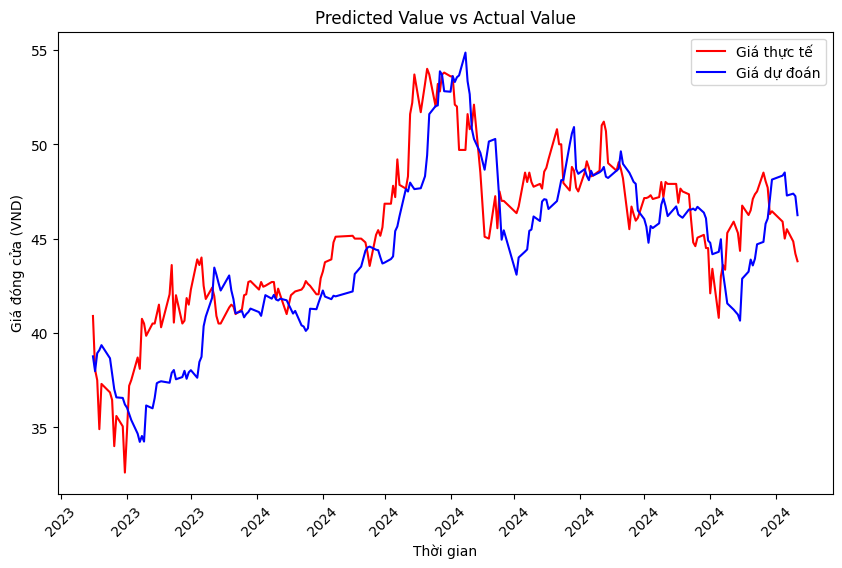

In [ ]:
plt.figure(figsize=(10, 6))
# Vẽ giá trị thực tế (y_test_actual) và giá trị dự đoán (y_pred)
plt.plot(df['Date'].iloc[len(df) - len(y_test_actual):], y_test_actual, label='Giá thực tế', color='red')
plt.plot(df['Date'].iloc[len(df) - len(y_pred):], y_pred, label='Giá dự đoán', color='blue')
# Thiết lập tiêu đề và nhãn trục
plt.title('Predicted Value vs Actual Value')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VND)')
# Định dạng trục x để hiển thị theo năm
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
# Đặt tự động xoay nhãn trục x nếu cần
plt.xticks(rotation=45)
# Hiển thị legend
plt.legend()
# Hiển thị đồ thị
plt.show()

## 7. Model accuracy

In [ ]:
#  Đánh giá mô hình
print("CNN Performance:")
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred)))
print("R2 Score:", r2_score(y_test_actual, y_pred))

CNN Performance:
MAE: 2.0643662847474578
MSE: 6.321504259792868
RMSE: 2.5142601814038397
R2 Score: 0.6444995463698546
